## plot bms figs

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
def plot_bms_freq(input_csv):
    """plot model frequency and exceed prob"""
    df = pd.read_csv(input_csv, index_col=None)
    df['model_name'] = df['model_name'].str.replace('subjects_','')
    df_sort = df.sort_values('model_frequency', ascending=False)[['model_frequency','exceedance_prob',
                                                                  'protected_exceedance_prob','model_name']]
    f = df_sort[['model_frequency','exceedance_prob','protected_exceedance_prob']].plot.bar()
    f.set_xticklabels(df_sort.model_name)
    fname = input_csv.split('/')[-1].split('.')[0]
    f.set_title('Bayesian model comparison ('+fname+')')
    f.get_figure().savefig('./figs/'+fname+'_freq.pdf')

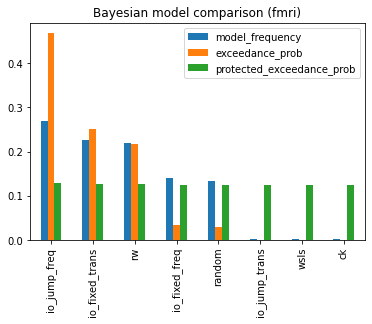

In [75]:
plot_bms_freq('./output/fmri.csv')

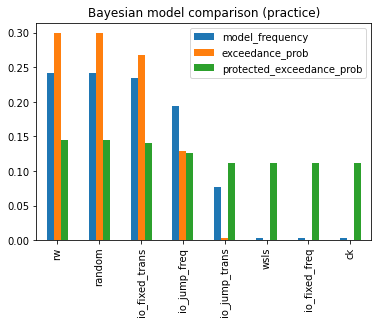

In [76]:
plot_bms_freq('./output/practice.csv')

In [81]:
def plot_subject(input_csv):
    """plot subject posterior"""
    df = pd.read_csv(input_csv, index_col=None)
    df.columns = df.columns.str.replace('subjects_','')
    g = sns.heatmap(df, cmap="YlGnBu", vmin=0, vmax=1)
    fname = input_csv.split('/')[-1].split('.')[0]
    plt.savefig('./figs/'+fname+'.pdf')

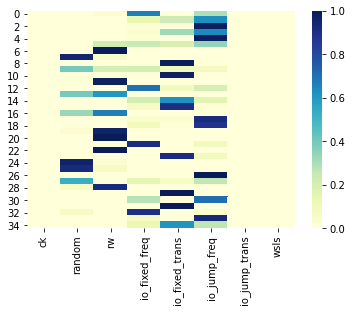

In [82]:
plot_subject('./output/fmri_subject.csv')

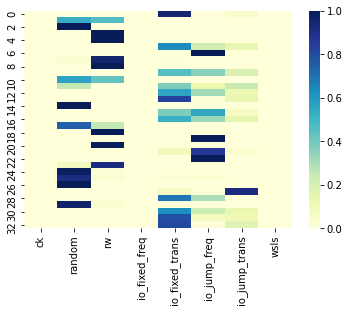

In [83]:
plot_subject('./output/practice_subject.csv')